# Lab 3: Breast Cancer Coimbra Data Set

In [104]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import sklearn # Version 1.0.2
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# ===== Optional : import other libraries here ===== #

# ===== End of Optional : import other libraries here ===== #

## Problem 1 (a): Download dataset
According to instruction PDF, download [Breast Cancer Coimbra Data Set](https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra) and extract file `dataR2.csv` to directory `./data`.

In [105]:
# Visualization: Load dataset

df = pd.read_csv('data/dataR2.csv')
features_pd = df.copy()
classification = features_pd.pop('Classification').to_numpy().astype(int)
print(">>> example features:\n", features_pd.head(5))
print(">>> example classification:", classification[:5])
print(">>> classification has unique (labels, counts):", np.unique(classification, return_counts=True))
features = features_pd.to_numpy().astype(np.float32)
print(">>> features has shape:", features.shape)

>>> example features:
    Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  
0  417.114  
1  468.786  
2  554.697  
3  928.220  
4  773.920  
>>> example classification: [0 0 0 0 0]
>>> classification has unique (labels, counts): (array([0, 1]), array([52, 64], dtype=int64))
>>> features has shape: (116, 9)


## Problem 1 (b): Exploratory data analysis
- Convert `classification` from [1, 2] to [0, 1] and save in new numpy array `classification_converted`.
- Plot scatter matrix with class=0 being red and class=1 being green.
- Select the first 40 rows of Class 0 and the first 48 rows of Class 1 as the test set (`training_data`, `test_class`) and the rest of the data as the test set (`test_data`, `test_class`).

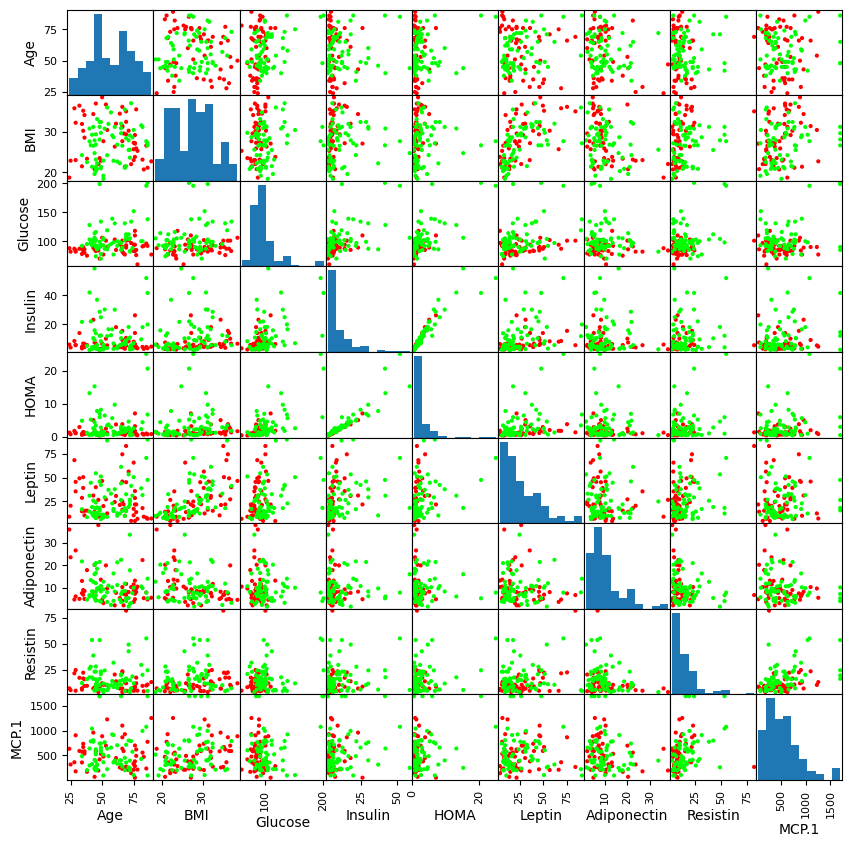

In [106]:
classification_converted = classification.copy()
training_data, training_class = None, None
test_data, test_class = None, None
# no need to convert
# ===== Convert classification to 0 or 1 ===== #

# ===== End of Convert classification to 0 or 1 ===== #

# ===== Make a colored scatter matrix ===== #
# Hint: use variable features_pd and pd.plotting.scatter_matrix()
# rows length of classification array, cols is 3 because RGB
colors = np.zeros((len(classification_converted), 3))
# tfVals is a true or false values
tfVals = np.where(classification == 1,True,False)
# mask is true when classification is 1, classification = 0 means false
# ===== End of Make a colored scatter matrix ===== #
# red = 0 green = 1
colors[tfVals == False] = [1,0,0] # red
colors[tfVals == True] = [0,1,0] # green
pd.plotting.scatter_matrix(features_pd, alpha=1, c = colors, figsize=[10,10])
plt.show()
# ===== Divide into training and test set ===== #
class0_td = classification[tfVals == False][:40]
class1_td = classification[tfVals == True][:48]
training_data1 = features_pd[tfVals == False][:40]
training_data2 = features[tfVals == True][:48]
training_data = np.vstack([training_data1, training_data2])
training_class = np.hstack([class0_td, class1_td]) #y train

class0_test = classification[tfVals == False][40:]
class1_test = classification[tfVals == True][48:]
test_data1 = features_pd[tfVals == False][40:]
test_data2 = features[tfVals == True][48:]
test_data = np.vstack([test_data1, test_data2]) #x test
test_class= np.hstack([class0_test, class1_test])#y test
# ===== End of Divide into training and test set ===== #

In [107]:
# TEST: 1(b)
assert(len(np.where(classification_converted == 0)[0]) == 52)
assert(len(np.where(classification_converted == 1)[0]) == 64)
assert(len(np.unique(classification_converted)) == 2)

assert(training_data.shape[0] == 88 and training_data.shape[1] == 9)
assert(test_data.shape[0] == 28 and test_data.shape[1] == 9)
assert(training_class.shape[0] == 88)
assert(test_class.shape[0] == 28)

print(f">>> Passed P1(b) Tests.")

>>> Passed P1(b) Tests.


## Problem 1 (c): Classification using KNN on Breast Cancer Coimbra Data Set
- Train kNN module with training data. Set `weights` to `uniform`, `metric` to `euclidean`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k.

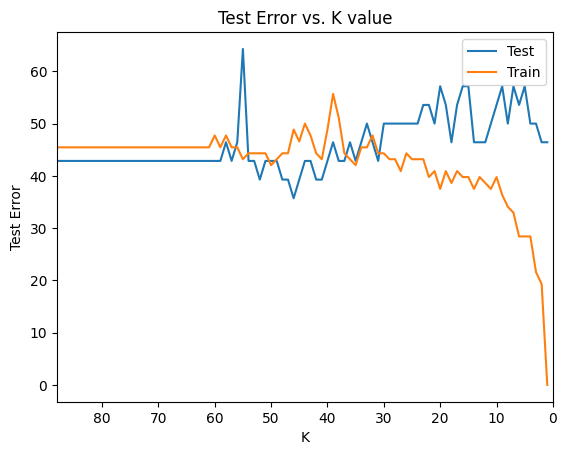

In [108]:
# ===== Classify training/test data ===== #
# x_train = training data
# y_train = output or labels of all the data
# x_test = test data
# y_test
k = range(1, 89)
trainError_rate = []
testError_rate = []
#print("size", len(training_data))
#print("size of test", len(test_data))
for i in reversed(k):
    #initializing model
    
    model = KNeighborsClassifier(n_neighbors = i, weights = 'uniform', metric = 'euclidean', algorithm='ball_tree')
    model = model.fit(training_data, training_class)

    #making the prediction
    trainingPredictions = model.predict(training_data)
    testPredictions = model.predict(test_data)
    #calculate how many points were misclassified
    trainError_rate.append(100*(1-accuracy_score(training_class, trainingPredictions)))
    testError_rate.append(100*(1-accuracy_score(test_class, testPredictions)))
plt.plot(range(88,0,-1), testError_rate, label = "Test",)
plt.plot(range(88,0,-1), trainError_rate, label = 'Train')
plt.title('Test Error vs. K value')
plt.xlim(88,0)
plt.xlabel('K')
plt.ylabel('Test Error')
plt.legend()
# ===== End of Plot misclassification rate ===== #

In [109]:
# ===== Which k^* is the most suitable k ===== #
testError_rate.reverse()
least_errorVal = min(testError_rate)
least_errorInd = testError_rate.index(least_errorVal)
bestie = least_errorInd + 1
print('Best K Value: {}'.format(bestie))
# ANSWER: K^* is {}.
# ===== End of Which k^* is the most suitable k ===== #

Best K Value: 46


## Problem 1 (d): Replace the Euclidean metric with the Minkowski distance
- Train kNN module with training data. Set `weights` to `uniform`, `metric` to `minkowski`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k and p.

In [110]:
# ===== Classify training/test data ===== #
k2 = range(1, 89)
p = range(1, 6)
currmin = 100
trainError_rate2 = []
testError_rate2 = []
kpPairs=[]

# ===== End of Classify training/test data ===== #
for i in reversed(k2):
    for j in p:
        #initializing model
        model = KNeighborsClassifier(n_neighbors = i, weights = 'uniform', metric = 'minkowski', p = j)
        model = model.fit(training_data, training_class)

        #making the prediction
        trainingPredictions = model.predict(training_data)
        testPredictions = model.predict(test_data)
        
        trainError_rate2.append(100*(1-accuracy_score(training_class, trainingPredictions)))
        curr = 100*(1-accuracy_score(test_class, testPredictions))
        testError_rate2.append(curr)
        #if(trainError_rate)
        if(curr < currmin):
            currmin = curr
            kpPairs.clear()
            kpPairs.append((i,j))   
        elif(curr == currmin):
            kpPairs.append((i,j))
        
# ===== Find the optimal (k^*, p^*) ===== #
# testError_rate2.reverse()
# least_errorVal2 = min(testError_rate2)
# least_errorInd2 = testError_rate2.index(least_errorVal2)

#ans = kpPairs[least_errorInd2]
#bestie_k = least_errorInd2 - 1
print('Best KP pair: {}'.format(kpPairs))
# ANSWER: k^* is {}, p^* is {}.
# ===== End of Find the optimal (k, p) ===== #


Best KP pair: [(52, 1), (48, 1), (11, 1)]


# Extra Credit
- Train kNN module with training data. Set `weights` to `distance`, `metric` to `minkowski`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k and p.

In [111]:
# ===== Classify training/test data ===== #

# ===== End of Classify training/test data ===== #

# ===== Find the optimal (k^*, p^*) ===== #

# ANSWER: k^* is {}, p^* is {}.
# ===== End of Find the optimal (k, p) ===== #